# 1850. Minimum Adjacent Swaps to Reach the Kth Smallest Number

### Difficulty: <font color = orange> Medium </font>

---

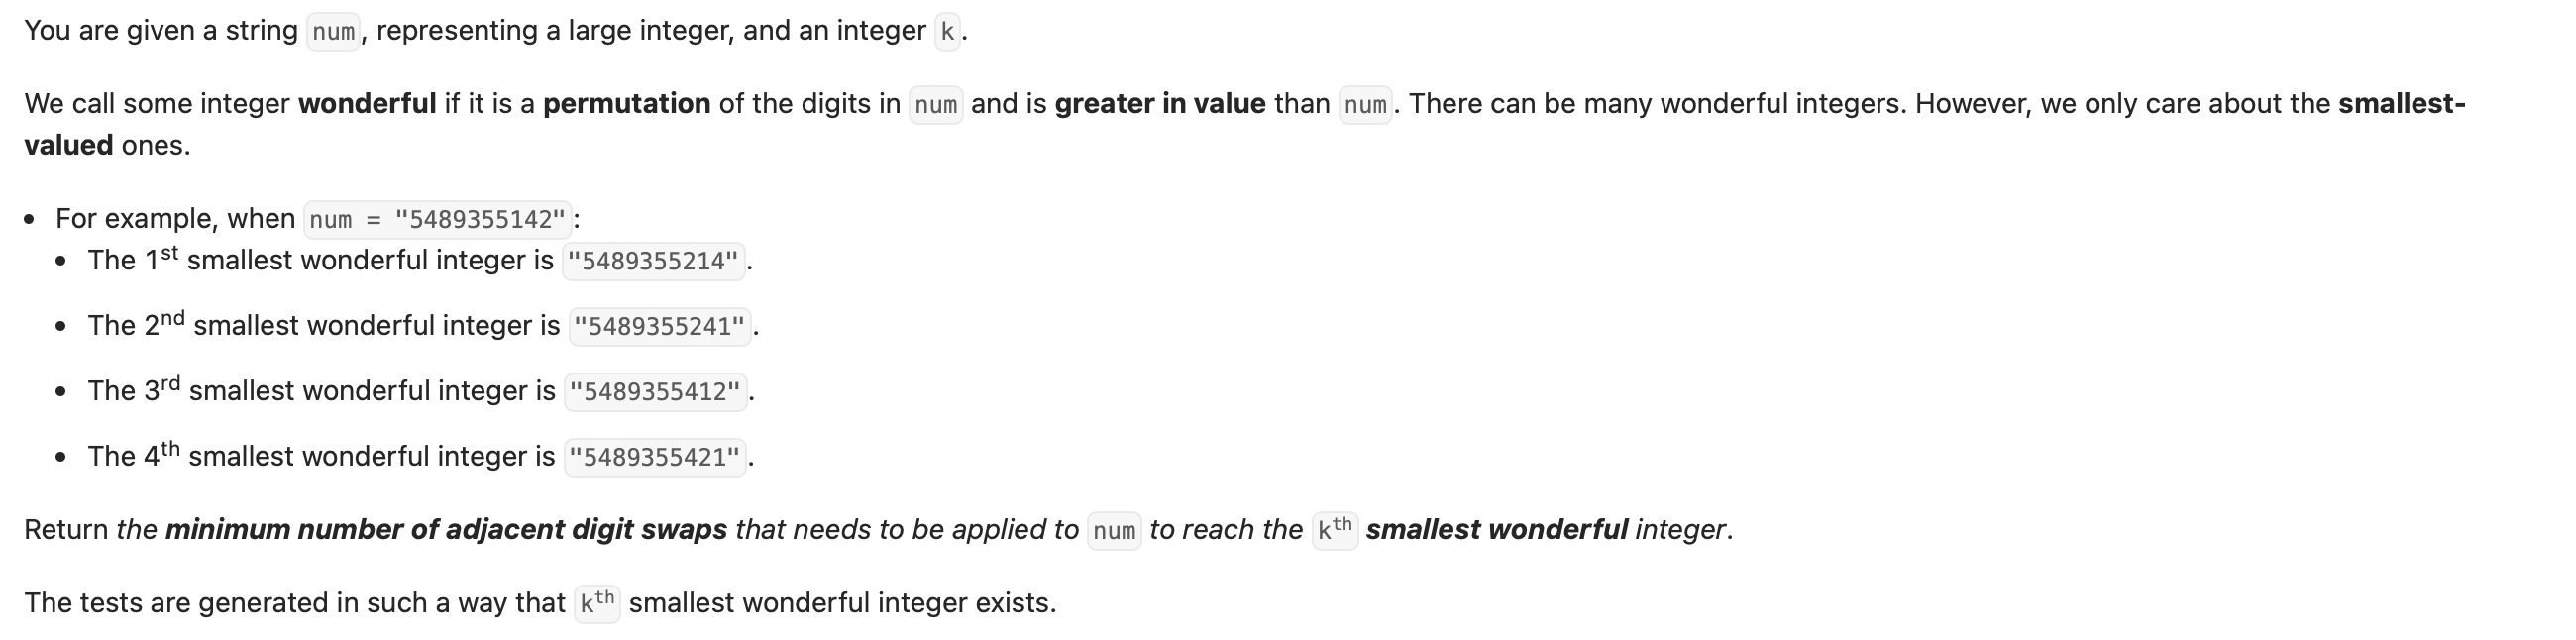

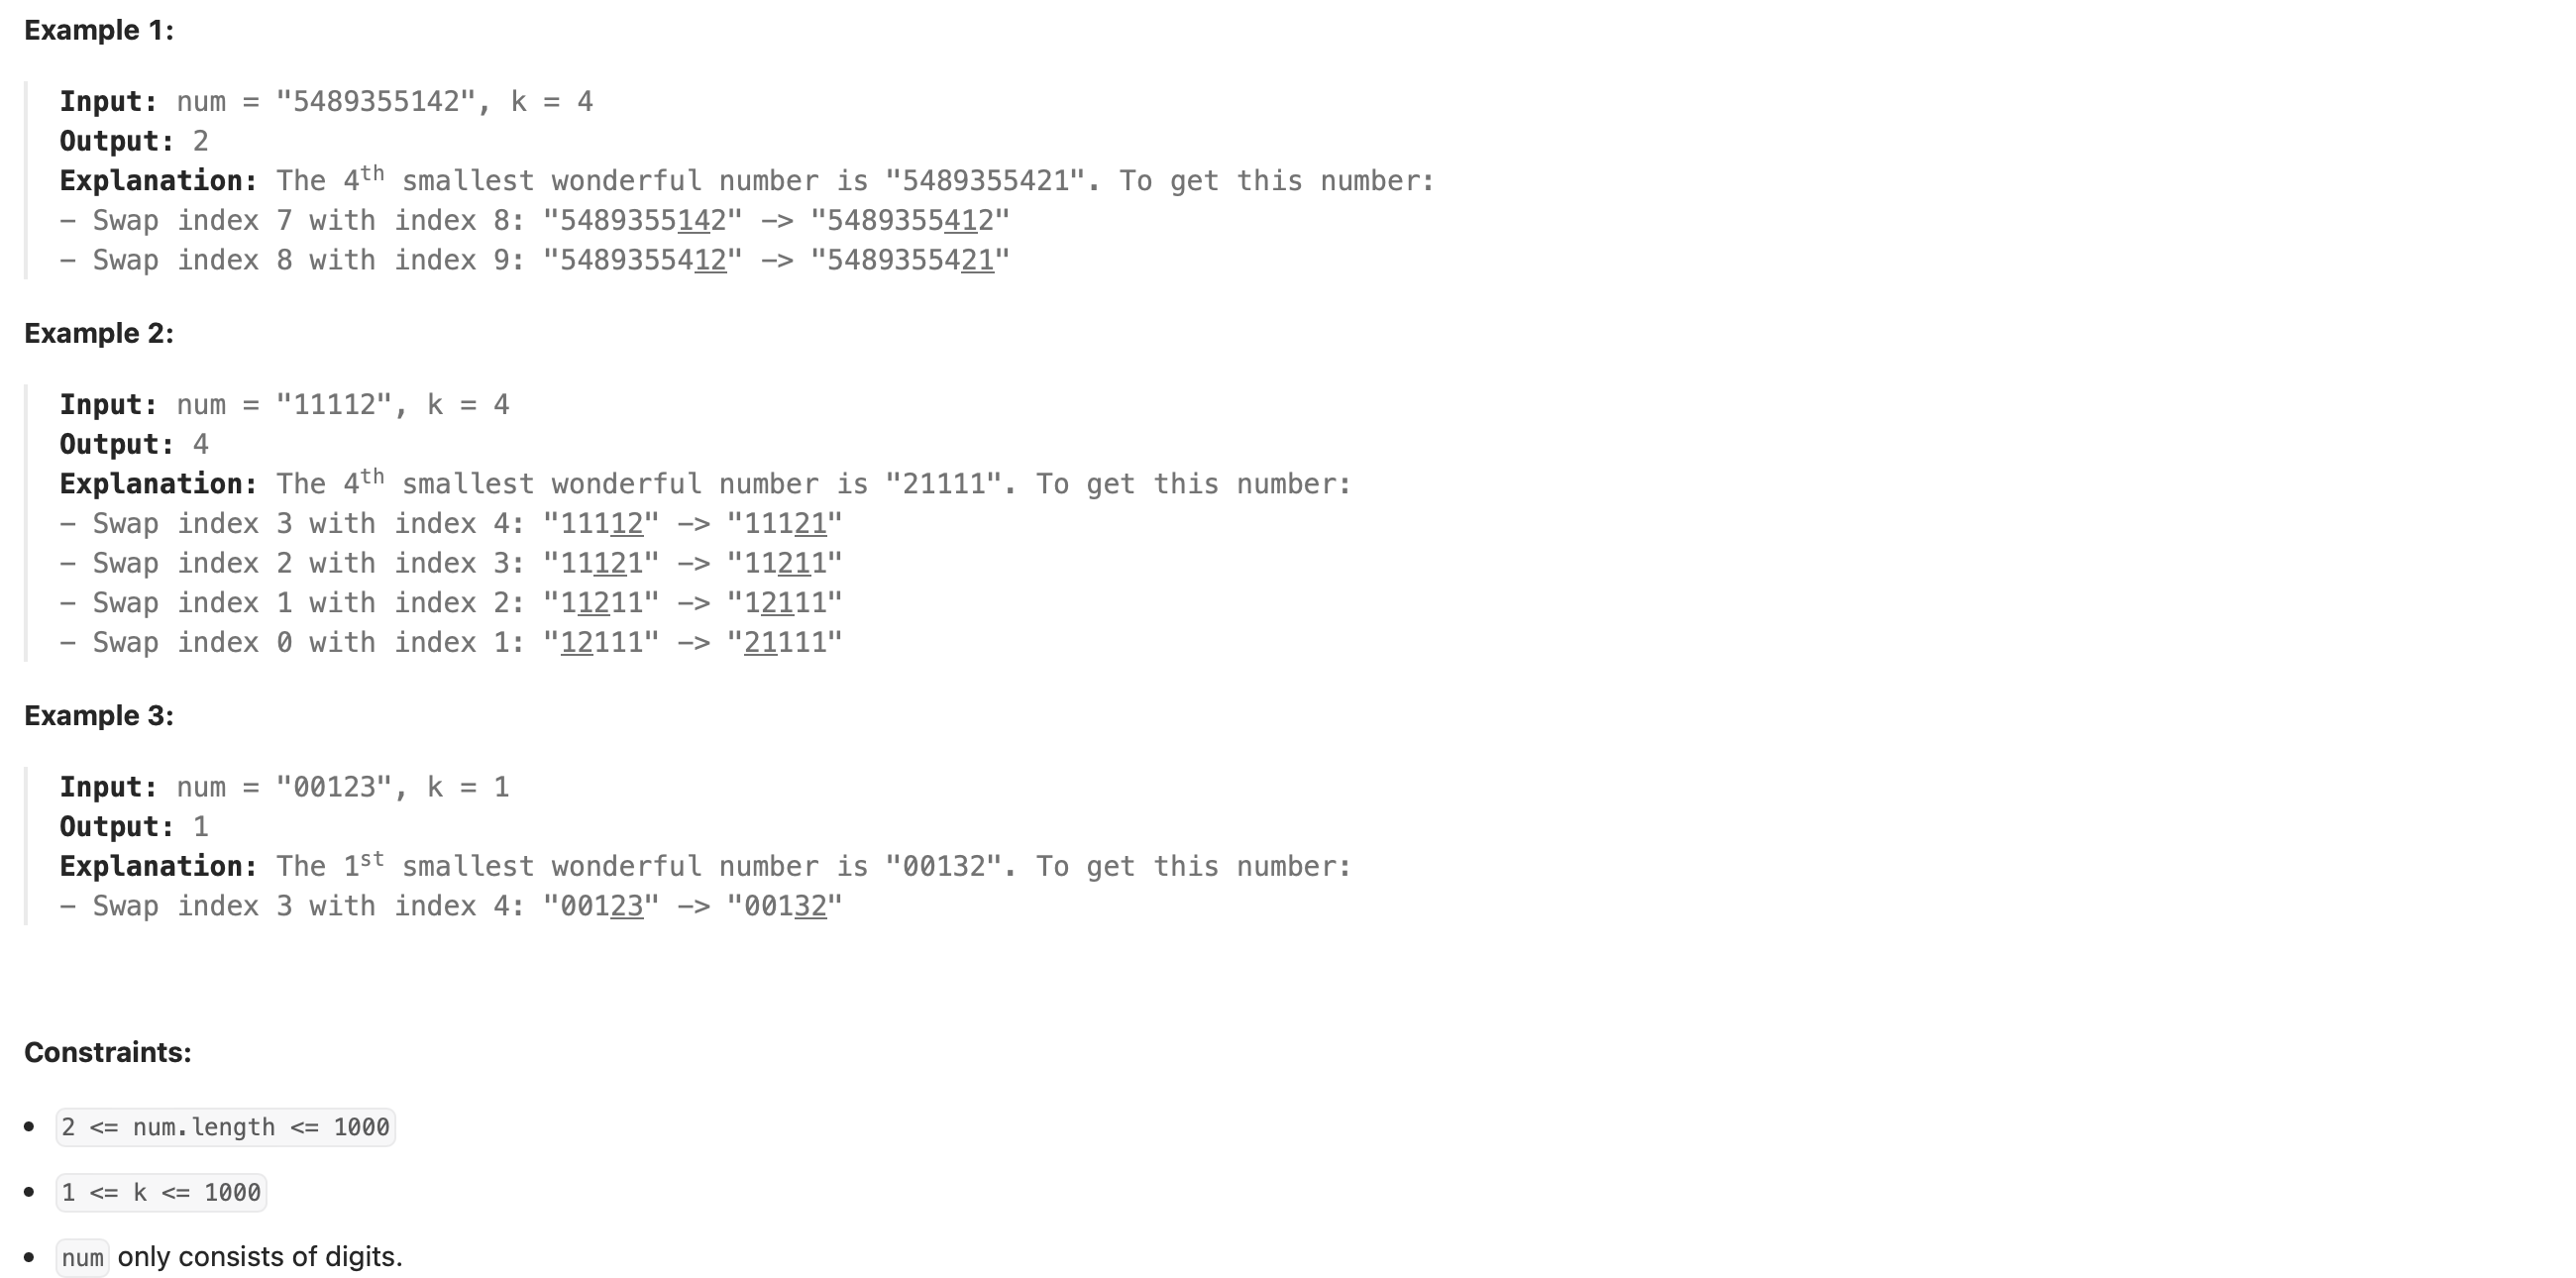

## Approach Overview:

Generate the `kth` smallest wonderful number, then count the minimum number of adjacent swaps required to convert `num` to the `kth` smallest wonderful number.

## Detailed Explanation:

Using a helper function to generate the `kth` smallest wonderful number.

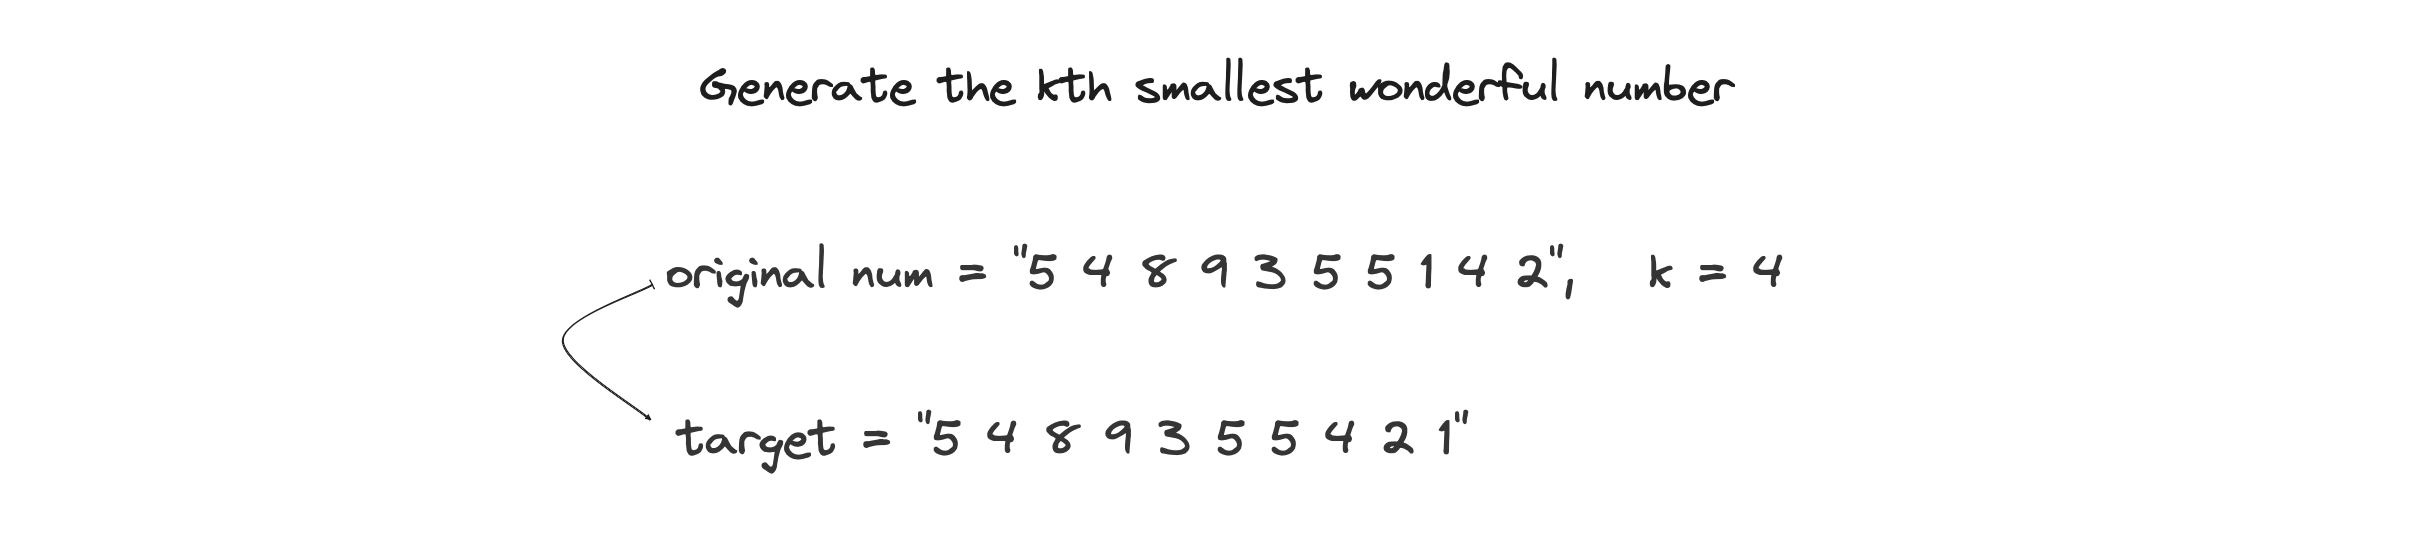



Loop through the digits of the `kth` smallest wondeful number (target array) and the original number until we find a mismatch.

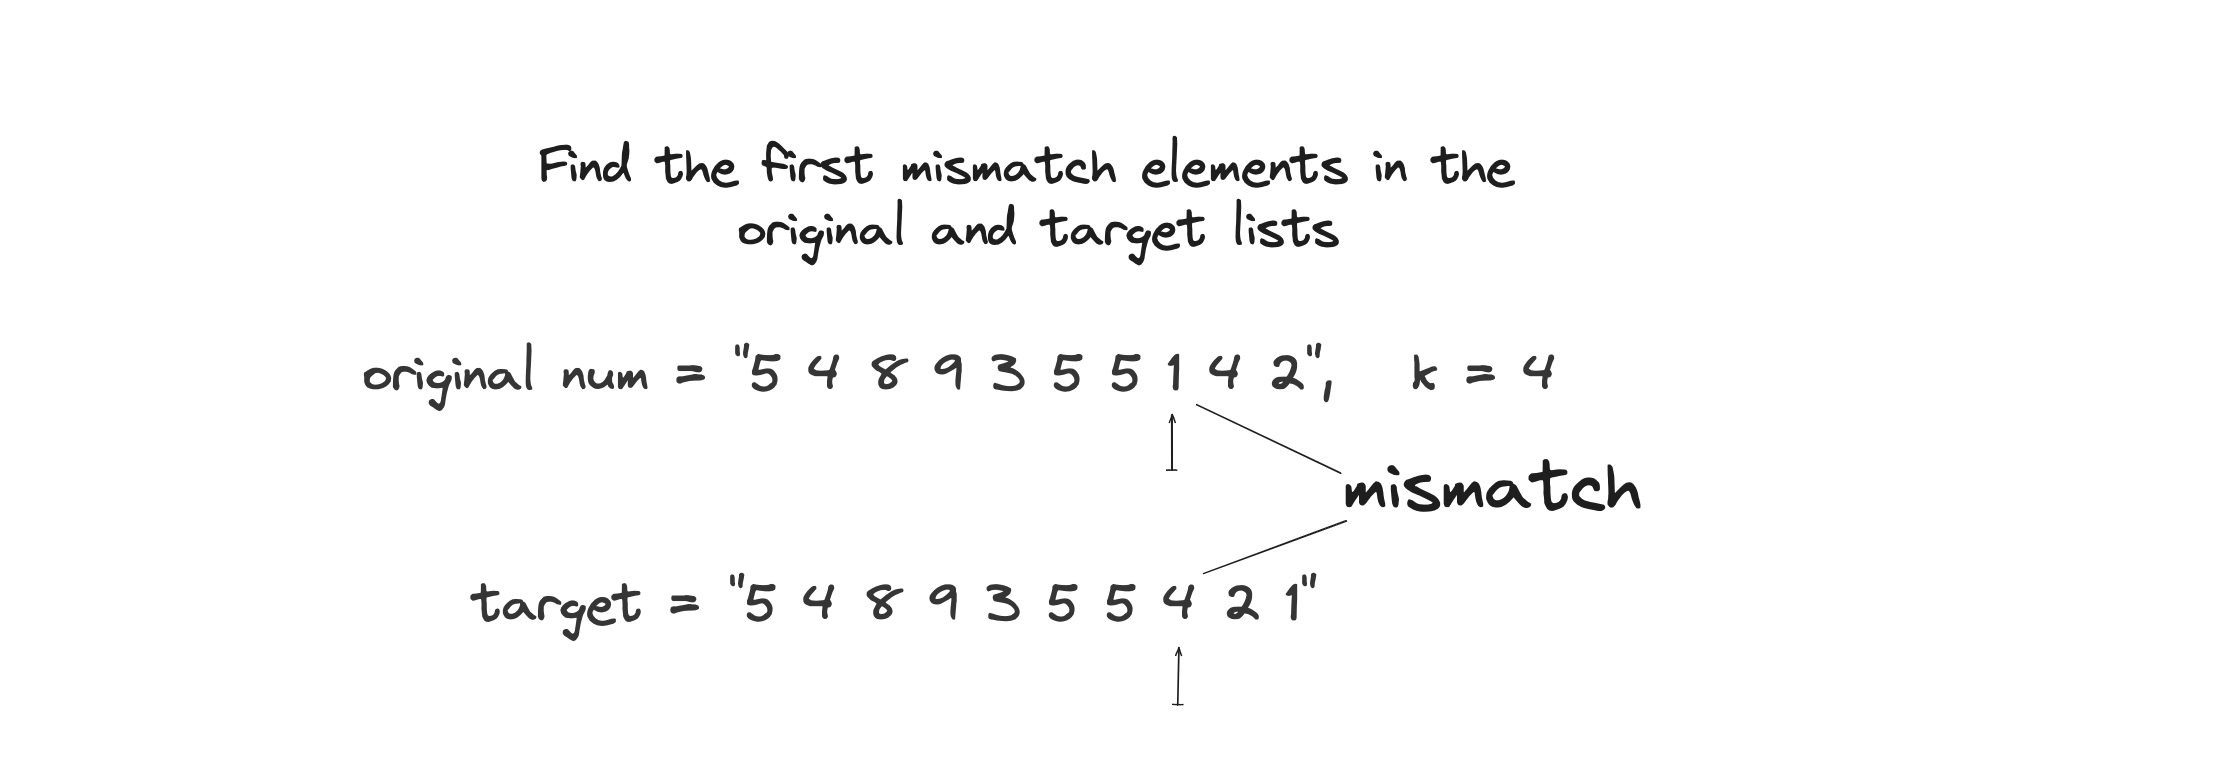

We now find where in original num is `target[i]` located. 
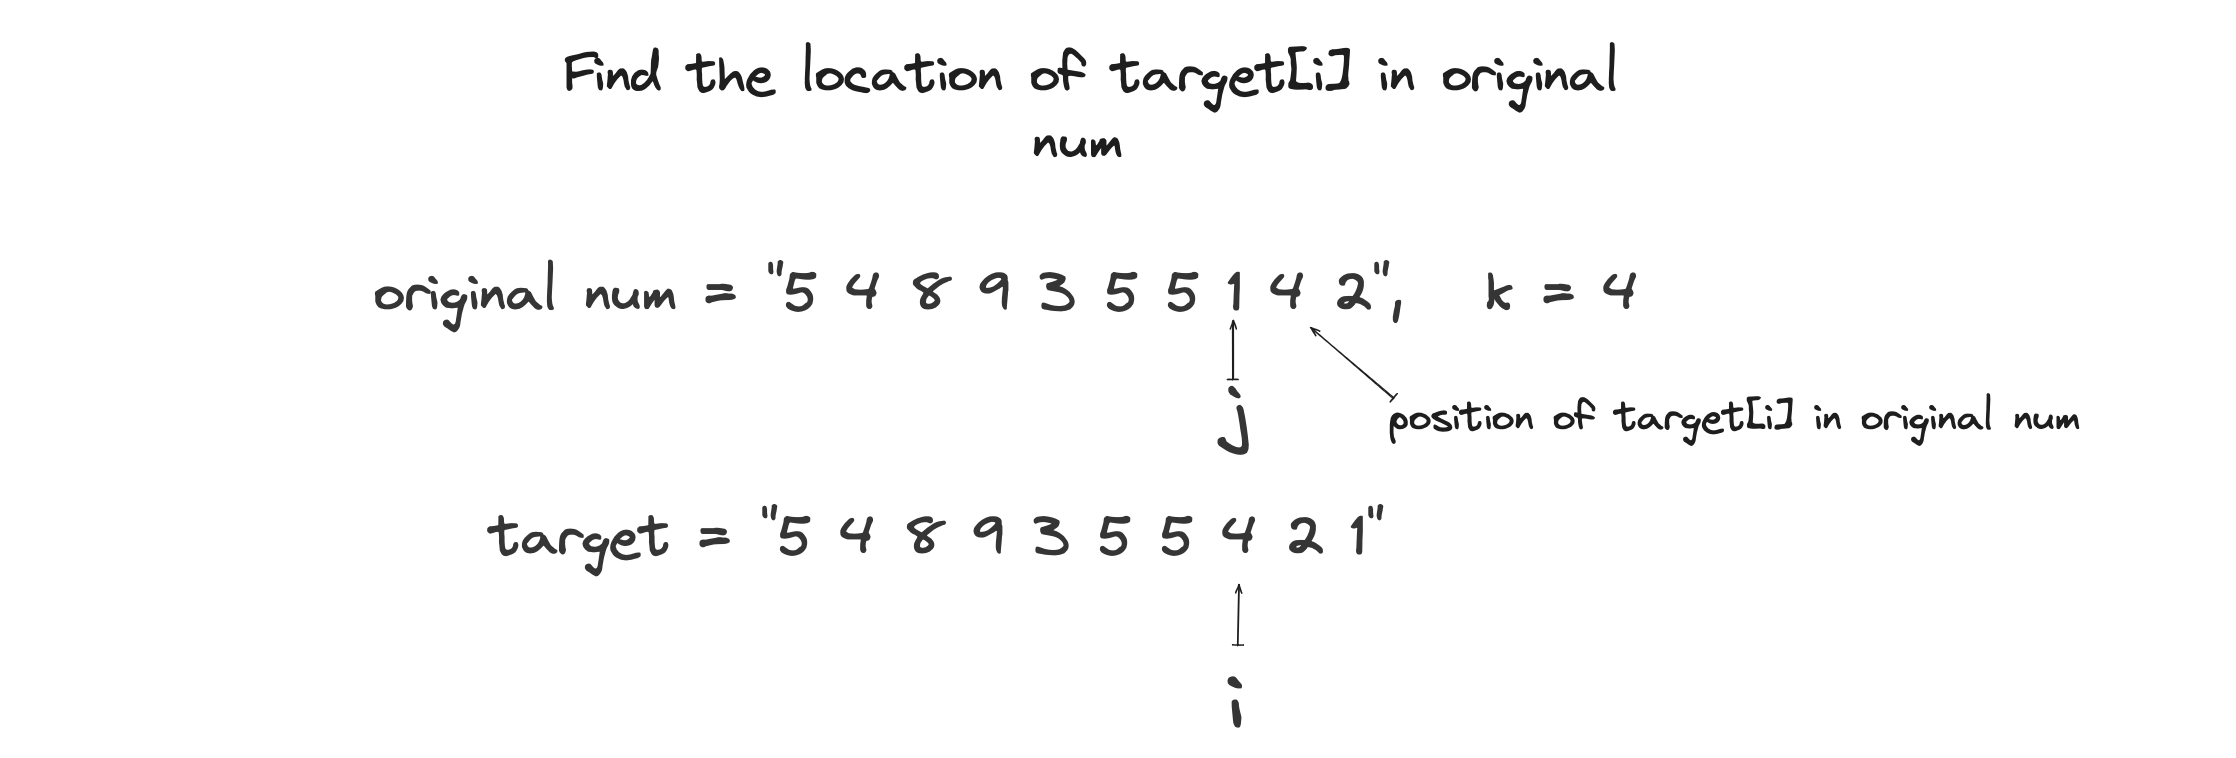

Once we've identified the position of `target[i]` in original num, we then loop through original num in the backward / reverse direction and swap `target[i]` with the next element until it's placed into the correct position.


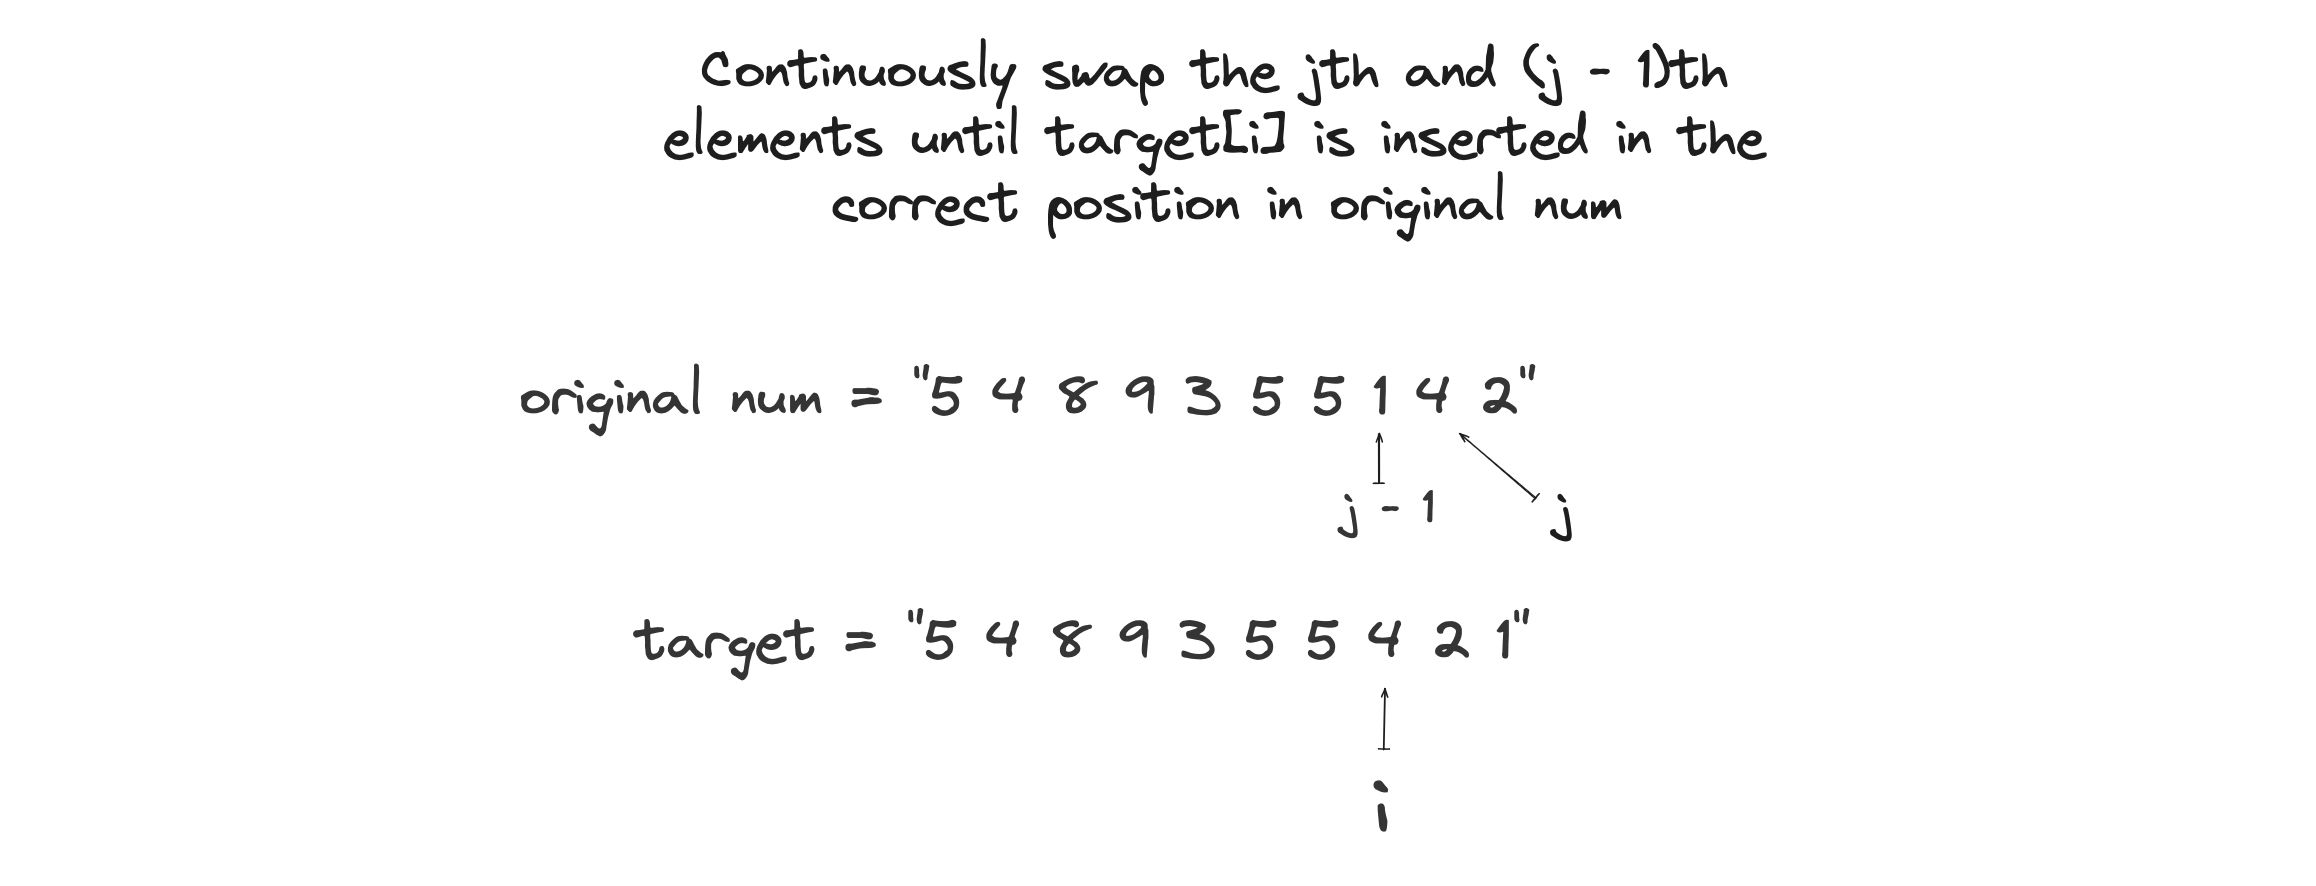

Move on to look at the next element and repeat the process if we find another mismatch.

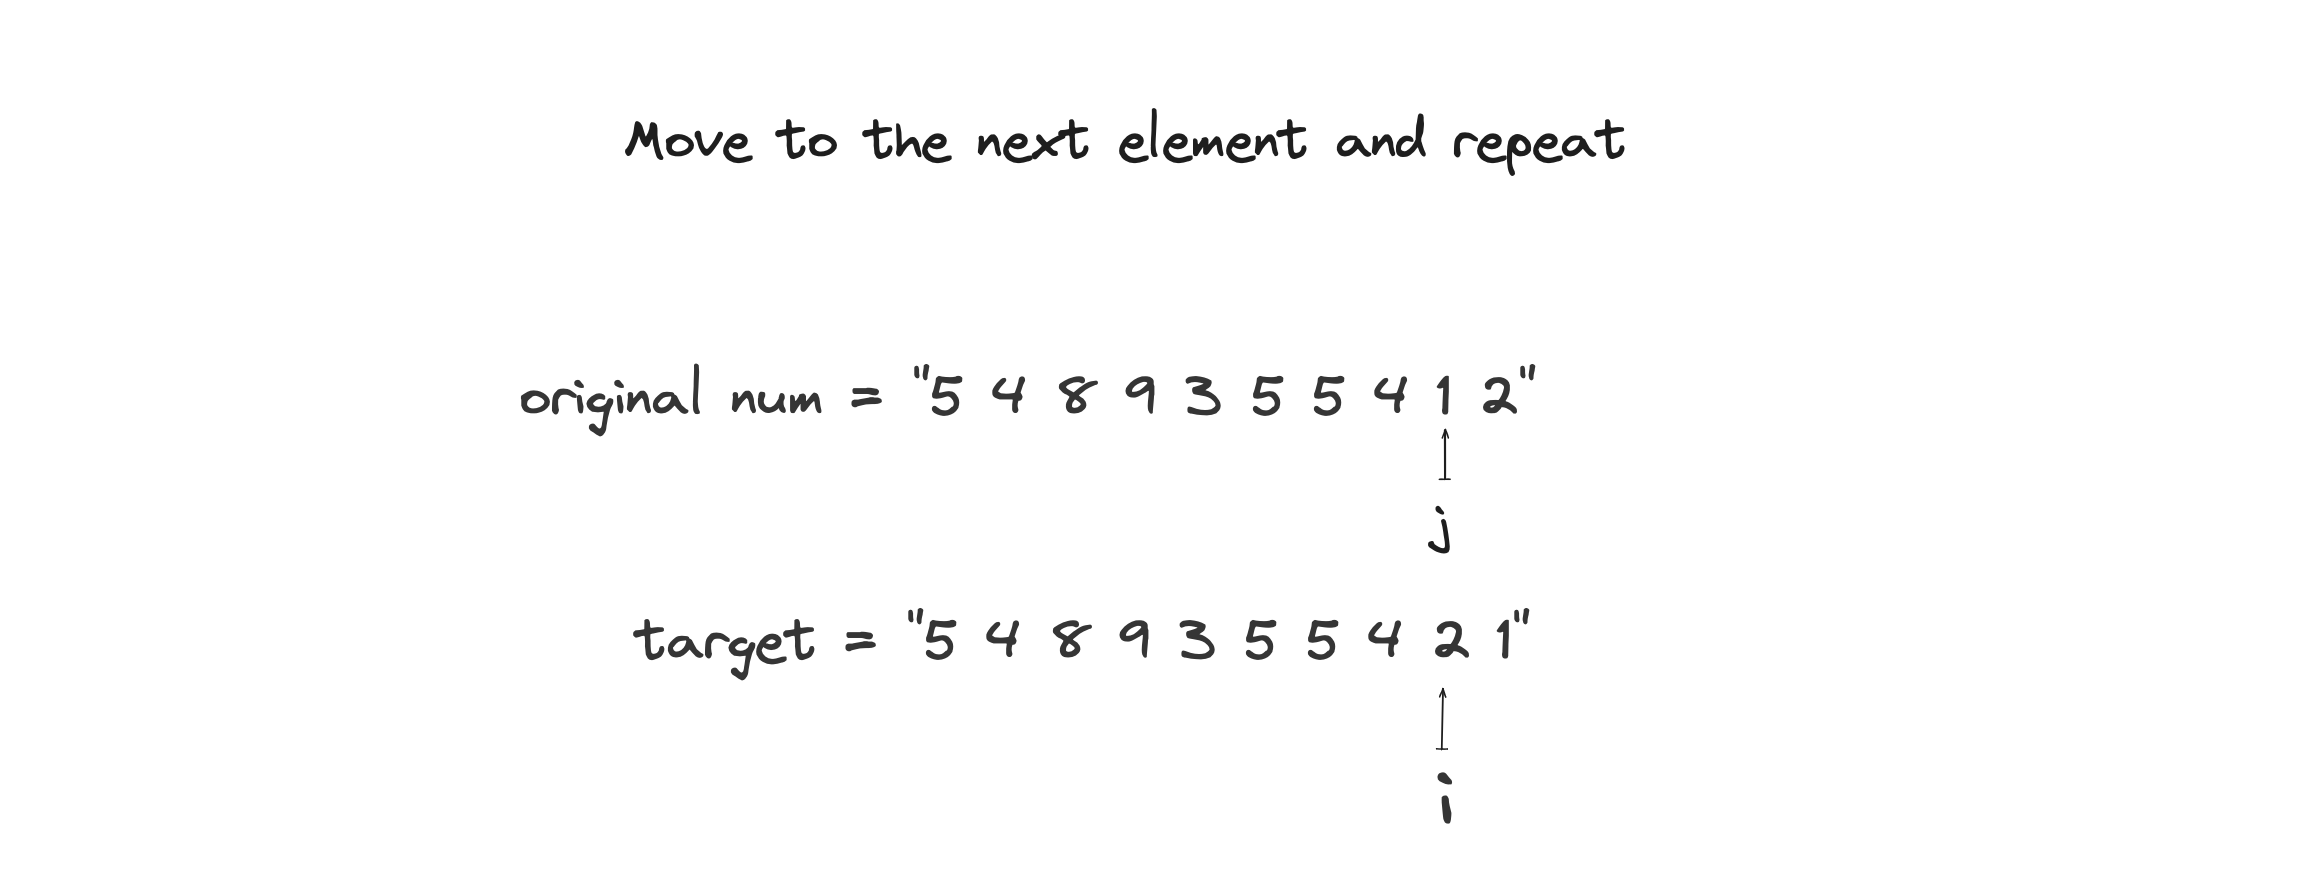

## Key Challenges:

In [ ]:
class Solution:

    def reverse(self, arr, l, r):
        # reverses the elements in arr from index l to r
        while l < r:
            arr[l], arr[r] = arr[r], arr[l]
            l += 1
            r -= 1

    def nextPermutation(self, arr, k):

        for _ in range(k):
            
            # initialize left to the position of the end / last digit in `num`
            left = len(arr) - 1
            
            # continue until we find the first non-increasing digit
            while left - 1 >= 0 and arr[left - 1] >= arr[left]:
                
                # decrement left to look at next rightmost digit in `num`
                left -= 1

            # check if left = 0 (i.e. this means all the digits in num are arranged in descending order)
            if left == 0:
                
                # reverse all of `arr`
                self.reverse(arr, left, len(arr) - 1)
            
            else:
                
                # initialize index to the position of the end / last digit in `num`
                index = len(arr) - 1

                # find the first digit greater than the non-increasing digit 
                while index >= 0 and arr[left - 1] >= arr[index]:
                    # decrement index
                    index -= 1
                
                # swap the two digits
                arr[left - 1], arr[index] = arr[index], arr[left - 1]

                # reverse the segment from left to the end 
                self.reverse(arr, left, len(arr) - 1)
        
        return arr

    def getMinSwaps(self, num: str, k: int) -> int:

        # initialize the number of adjacent swaps to 0
        adjacentSwaps = 0

        # convert num from string to list of characters
        num = list(num)

        # make a copy of the original number
        originalNum = num.copy()
        
        # generate the kth smallest wonderful integer
        target = self.nextPermutation(num, k)
                
    # loop through each index position in target to count minimum adjacent swaps
        for i in range(len(target)):

    # check if the element in target at the current position doesn't match the element in originalNum
            if target[i] != originalNum[i]:

                # find the position of target[i] in originalNum starting from index i + 1
                j = i + 1
                while target[i] != originalNum[j]:
                    j += 1

                # perform adjacent swaps to move target[i] to the correct position in originalNum
                while j > i:
                    
                    # swap the jth and (j - 1)th elements
                    originalNum[j - 1], originalNum[j] = originalNum[j], originalNum[j - 1]
                    # decrement j
                    j -= 1
                    # increment number of adjacent swaps performed
                    adjacentSwaps += 1
                
        return adjacentSwaps        